In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score

data = pd.read_csv('../netflow_label.csv')
# Displaying the data
data.info()
data.columns
data.drop(columns=['tag'], inplace=True)
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252510 entries, 0 to 252509
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time_start                  252510 non-null  object 
 1    time_end                   252369 non-null  object 
 2   duration                    252369 non-null  float64
 3   src_ip                      252369 non-null  object 
 4   dest_ip                     252369 non-null  object 
 5   src_port                    252369 non-null  float64
 6   dest_port                   252369 non-null  float64
 7   proto                       252369 non-null  object 
 8   flags                       252369 non-null  object 
 9   router_ip_address_exported  252369 non-null  object 
 10  exporter_engine_type_id     252369 non-null  object 
 11  exporter_id                 252369 non-null  float64
 12  transition                  252369 non-null  object 
 13  label         

Index(['time_start', ' time_end', 'duration', 'src_ip', 'dest_ip', 'src_port',
       'dest_port', 'proto', 'flags', 'router_ip_address_exported',
       'exporter_engine_type_id', 'exporter_id', 'transition', 'label'],
      dtype='object')

In [3]:
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

#將 Dtyoe 轉為 integer
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252510 entries, 0 to 252509
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   time_start                  252510 non-null  int32
 1    time_end                   252510 non-null  int32
 2   duration                    252510 non-null  int64
 3   src_ip                      252510 non-null  int32
 4   dest_ip                     252510 non-null  int32
 5   src_port                    252510 non-null  int64
 6   dest_port                   252510 non-null  int64
 7   proto                       252510 non-null  int32
 8   flags                       252510 non-null  int32
 9   router_ip_address_exported  252510 non-null  int32
 10  exporter_engine_type_id     252510 non-null  int32
 11  exporter_id                 252510 non-null  int64
 12  transition                  252510 non-null  int32
 13  label                       252510 non-null 

Index(['time_start', ' time_end', 'duration', 'src_ip', 'dest_ip', 'src_port',
       'dest_port', 'proto', 'flags', 'router_ip_address_exported',
       'exporter_engine_type_id', 'exporter_id', 'transition', 'label'],
      dtype='object')

In [4]:
print(data[0:5])

   time_start   time_end  duration  src_ip  dest_ip  src_port  dest_port  \
0           0          0         0     639     1275     26672         12   
1           0          0         0     442     1715        12      16390   
2           1          1         2     464      168     24230          4   
3           1          1         0     464      168     24230          4   
4           1          1         2     110     1546         4      14431   

   proto  flags  router_ip_address_exported  exporter_engine_type_id  \
0      1      3                           0                        0   
1      1      6                           0                        0   
2      1     13                           0                        0   
3      1     31                           0                        0   
4      1     15                           0                        0   

   exporter_id  transition  label  
0            0        6503      1  
1            0        6503      0  
2 

In [5]:
# Taking care of missing data, Removing duplicates
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop missing values
data.dropna(inplace=True)
print(data.duplicated().sum())

data.drop_duplicates(inplace = True)
print(data.duplicated().sum())


142
0


In [6]:

# Implementing binary classification
print(data["label"])


0         1
1         0
2         1
3         1
4         0
         ..
252505    0
252506    0
252507    0
252508    0
252509    0
Name: label, Length: 252368, dtype: int32


In [7]:


df=data
train, test = train_test_split(df, test_size=0.2)

# print(train.info())
# print(test.info())

print("---------------")
print("Full dataset:")
print("---------------")
print("Malicious: " + str(df['label'].value_counts()[[1]].sum()))
print("Benign: " + str(df['label'].value_counts()[[0]].sum()))
print("")


print("---------------")
print("Training set:")
print("---------------")
print("Malicious: " + str(train['label'].value_counts()[[1]].sum()))
print("Benign: " + str(train['label'].value_counts()[[0]].sum()))
print("")


print("---------------")
print("Test set:")
print("---------------")
print("Malicious: " + str(test['label'].value_counts()[[1]].sum()))
print("Benign: " + str(test['label'].value_counts()[[0]].sum()))
print("")


---------------
Full dataset:
---------------
Malicious: 165957
Benign: 86411

---------------
Training set:
---------------
Malicious: 132637
Benign: 69257

---------------
Test set:
---------------
Malicious: 33320
Benign: 17154



In [8]:
y_train = np.array(train.pop('label'))# pop removes "Label" from the dataframe
X_train = train.values

y_test = np.array(test.pop('label')) # pop removes "Label" from the dataframe
X_test = test.values



In [9]:
# Checking unique values in the label column
df['label'].unique()

array([1, 0])

## Neural Network

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Conv1D,MaxPool1D,Dropout,Flatten,Reshape
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [12]:
model = Sequential() # initializing model
#lstm
model.add(Conv1D(512,1, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(LSTM(units=16,return_sequences=False,dropout=0.2))
model.add(Dense(units=3,activation='softmax'))

In [13]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 512)           1024      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 512)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 16)                33856     
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 34,931
Trainable params: 34,931
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test,y_test))

Epoch 1/50
395/395 [==============================] - 15s 35ms/step - loss: 0.4205 - accuracy: 0.8204 - val_loss: 0.2820 - val_accuracy: 0.9011
Epoch 2/50
395/395 [==============================] - 13s 34ms/step - loss: 0.2701 - accuracy: 0.9004 - val_loss: 0.2527 - val_accuracy: 0.9015
Epoch 3/50
395/395 [==============================] - 13s 33ms/step - loss: 0.2526 - accuracy: 0.9086 - val_loss: 0.2429 - val_accuracy: 0.9158
Epoch 4/50
395/395 [==============================] - 13s 33ms/step - loss: 0.2465 - accuracy: 0.9129 - val_loss: 0.2381 - val_accuracy: 0.9161
Epoch 5/50
395/395 [==============================] - 13s 34ms/step - loss: 0.2414 - accuracy: 0.9138 - val_loss: 0.2362 - val_accuracy: 0.9161
Epoch 6/50
395/395 [==============================] - 13s 33ms/step - loss: 0.2395 - accuracy: 0.9143 - val_loss: 0.2348 - val_accuracy: 0.9166
Epoch 7/50
395/395 [==============================] - 13s 33ms/step - loss: 0.2377 - accuracy: 0.9142 - val_loss: 0.2329 - val_accuracy:

In [15]:
# 查看 Loss Value
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# 查看 Accuracy
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

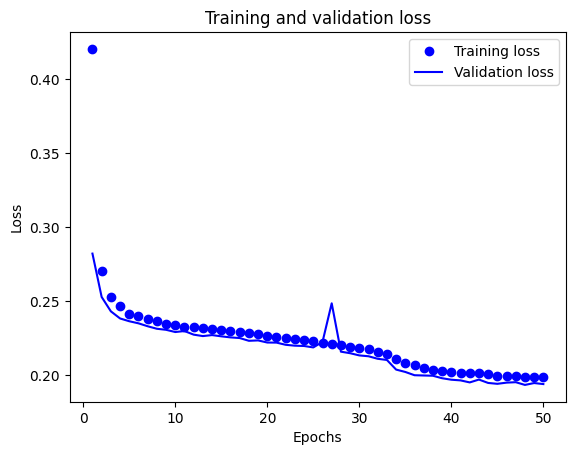

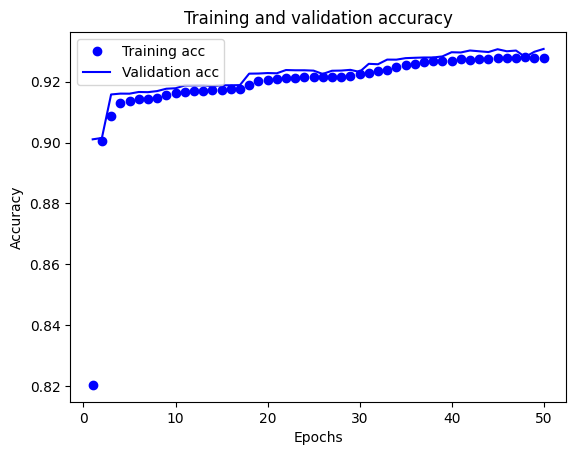

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf() 

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:

predictions = model.predict(X_test)


1578/1578 [==============================] - 2s 1ms/step


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 计算准确率
accuracy = accuracy_score(y_test, np.argmax(predictions, axis=1))
print(f"Accuracy on test set: {accuracy}")

# 打印分类报告
print(classification_report(y_test, np.argmax(predictions, axis=1)))

# 创建并打印混淆矩阵
conf_matrix = confusion_matrix(y_test, np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)


Accuracy on test set: 0.9307762412331101
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     17154
           1       0.96      0.93      0.95     33320

    accuracy                           0.93     50474
   macro avg       0.92      0.93      0.92     50474
weighted avg       0.93      0.93      0.93     50474

Confusion Matrix:
[[15917  1237]
 [ 2257 31063]]


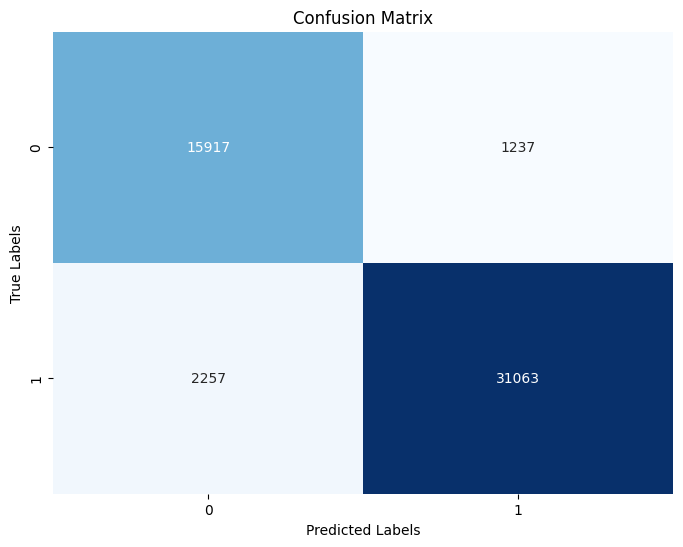

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建混淆矩阵的热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Supervised Learning

In [20]:
from sklearn.svm import SVC

# 初始化 SVM 模型
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # 可以根据需要调整参数


In [21]:
# 模型訓練
svm_model.fit(X_train, y_train)


SVC()

In [22]:
# 模型預測
svm_predictions = svm_model.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 計算精確率
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy on test set using SVM: {svm_accuracy}")

# 印出分類報告
print("Classification Report using SVM:")
print(classification_report(y_test, svm_predictions))

# 印出混淆矩陣
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix using SVM:")
print(svm_conf_matrix)


Accuracy on test set using SVM: 0.9470222292665531
Classification Report using SVM:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     17154
           1       0.95      0.98      0.96     33320

    accuracy                           0.95     50474
   macro avg       0.95      0.93      0.94     50474
weighted avg       0.95      0.95      0.95     50474

Confusion Matrix using SVM:
[[15298  1856]
 [  818 32502]]


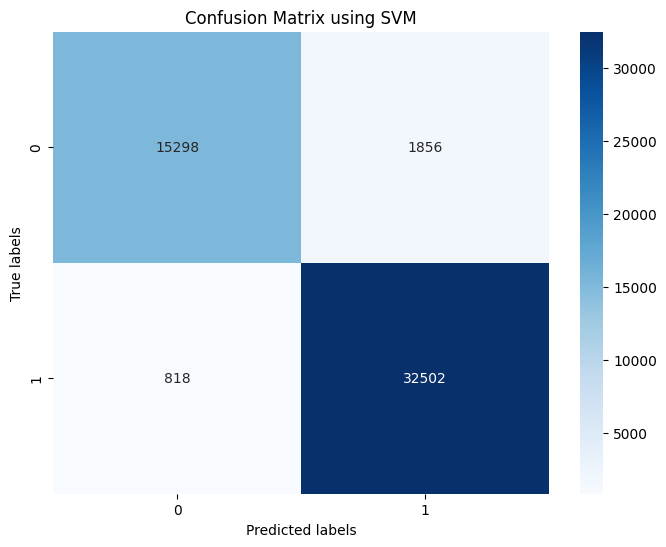

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using SVM')
plt.show()

## Unsupervied Learning

In [95]:
from sklearn.cluster import KMeans

# 初始化 K-means 模型
kmeans_model = KMeans(n_clusters=2)  # 选择合适的簇数量

# 使用 X_train 訓練模型
kmeans_model.fit(X_train)
# kmeans_model.fit(X_test)

KMeans(n_clusters=2)

In [96]:
# 獲取類聚的標籤
kmeans_labels = kmeans_model.labels_
print(kmeans_labels)

# 假設已知數聚的類別是 0 和 1, 根據類聚的結果將 cluster 轉為類別標籤
kmeans_predicted_labels = [1 if label == 1 else 0 for label in kmeans_labels]
print(kmeans_predicted_labels)

[1 1 1 ... 0 1 1]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Training Dataset

# 計算精確度
kmeans_accuracy = accuracy_score(y_train, kmeans_predicted_labels)
print(f"Accuracy using K-means for clustering: {kmeans_accuracy}")

# 印出分類報告
print("Classification Report using K-means for clustering:")
print(classification_report(y_train, kmeans_predicted_labels))

# 印出混淆矩陣
kmeans_conf_matrix = confusion_matrix(y_train, kmeans_predicted_labels)
print("Confusion Matrix using K-means for clustering:")
print(kmeans_conf_matrix)


Accuracy using K-means for clustering: 0.6160262315868723
Classification Report using K-means for clustering:
              precision    recall  f1-score   support

           0       0.45      0.59      0.51     69257
           1       0.75      0.63      0.68    132637

    accuracy                           0.62    201894
   macro avg       0.60      0.61      0.60    201894
weighted avg       0.65      0.62      0.62    201894

Confusion Matrix using K-means for clustering:
[[40628 28629]
 [48893 83744]]


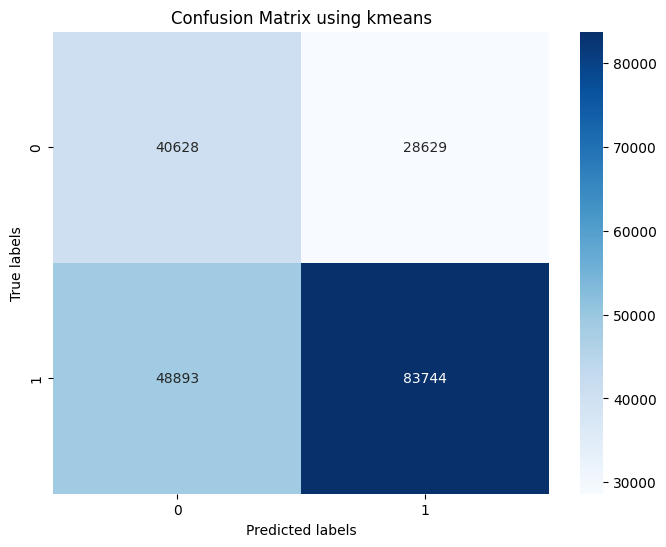

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kmeans_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using kmeans')
plt.show()

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

kemans_predict = kmeans_model.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 計算精確度
kmeans_accuracy = accuracy_score(y_test, kemans_predict)
print(f"Accuracy using K-means for clustering: {kmeans_accuracy}")

# 印出分類報告
print("Classification Report using K-means for clustering:")
print(classification_report(y_test, kemans_predict))

# 印出混淆矩陣
kmeans_conf_matrix = confusion_matrix(y_test, kemans_predict)
print("Confusion Matrix using K-means for clustering:")
print(kmeans_conf_matrix)


Accuracy using K-means for clustering: 0.6197844434758489
Classification Report using K-means for clustering:
              precision    recall  f1-score   support

           0       0.45      0.59      0.51     17154
           1       0.75      0.64      0.69     33320

    accuracy                           0.62     50474
   macro avg       0.60      0.61      0.60     50474
weighted avg       0.65      0.62      0.63     50474

Confusion Matrix using K-means for clustering:
[[10098  7056]
 [12135 21185]]


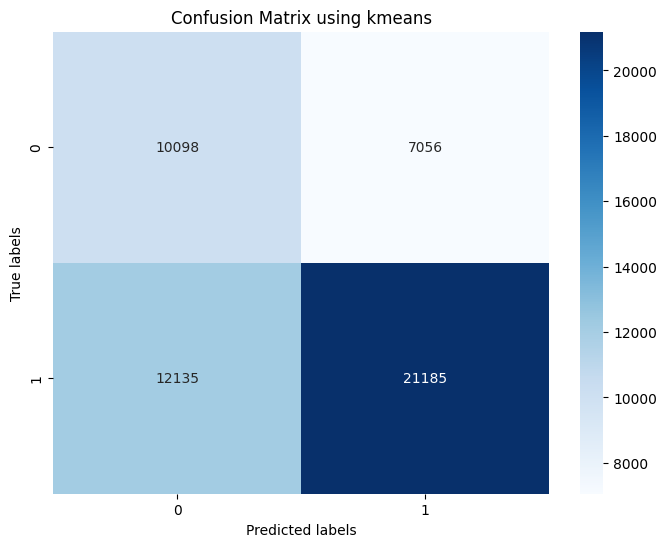

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kmeans_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using kmeans')
plt.show()

In [105]:
df_svm = pd.DataFrame(svm_predictions, columns=["SVM"])
print(df_svm)


df_km = pd.DataFrame(kemans_predict, columns=["Kmeans"])
print(df_km)




       SVM
0        1
1        1
2        0
3        1
4        1
...    ...
50469    0
50470    0
50471    0
50472    1
50473    1

[50474 rows x 1 columns]
       Kmeans
0           0
1           0
2           0
3           1
4           0
...       ...
50469       1
50470       0
50471       0
50472       0
50473       0

[50474 rows x 1 columns]


## Compare Supervised Learning Label and Unsupervised Learning Label and generate Hybrid Machine Learning Label

In [112]:



# 建立 Hy 欄位根據指定的邏輯
df_hy = pd.DataFrame()

conditions = [
    ((df_svm['SVM'] == 0) & (df_km['Kmeans'] == 0)),
    ((df_svm['SVM'] == 1) & (df_km['Kmeans'] == 0)),
    ((df_svm['SVM'] == 1) & (df_km['Kmeans'] == 1)),
    ((df_svm['SVM'] == 0) & (df_km['Kmeans'] == 1))
]

choices = [0, 1, 1, 2]

df_hy['Hy'] = np.select(conditions, choices, default=np.nan).astype(int)



# 將 df_svm 和 df_km 按列合併
df_result = pd.concat([df_km, df_hy], axis=1)
df_result = pd.concat([df_svm, df_result], axis=1)

# 將合併後的結果保存到 CSV 檔案中
df_result.to_csv('G:\我的雲端硬碟\Research\IDS\IDS_CTI\ML\label.csv', index=False)  # index=False 可以避免將索引列寫入到 CSV 檔案中

# 顯示合併後的 DataFrame
print(df_result)


       SVM  Kmeans  Hy
0        1       0   1
1        1       0   1
2        0       0   0
3        1       1   1
4        1       0   1
...    ...     ...  ..
50469    0       1   2
50470    0       0   0
50471    0       0   0
50472    1       0   1
50473    1       0   1

[50474 rows x 3 columns]


In [121]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 計算精確度
hybrid_accuracy = accuracy_score(y_test, df_hy)
print(f"Accuracy using hybrid machine learning: {hybrid_accuracy}")

# 印出分類報告
print("Classification Report using hybrid machine learning:")
print(classification_report(y_test, df_hy))

# 印出混淆矩陣
hybrid_conf_matrix = confusion_matrix(y_test, df_hy)[:2,:]
print("Confusion Matrix using hybrid machine learning:")
print(hybrid_conf_matrix)


Accuracy using hybrid machine learning: 0.83066529302215
Classification Report using hybrid machine learning:
              precision    recall  f1-score   support

           0       0.95      0.55      0.69     17154
           1       0.95      0.98      0.96     33320
           2       0.00      0.00      0.00         0

    accuracy                           0.83     50474
   macro avg       0.63      0.51      0.55     50474
weighted avg       0.95      0.83      0.87     50474

Confusion Matrix using hybrid machine learning:
[[ 9425  1856  5873]
 [  546 32502   272]]


C:\Users\yisin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yisin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yisin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarni

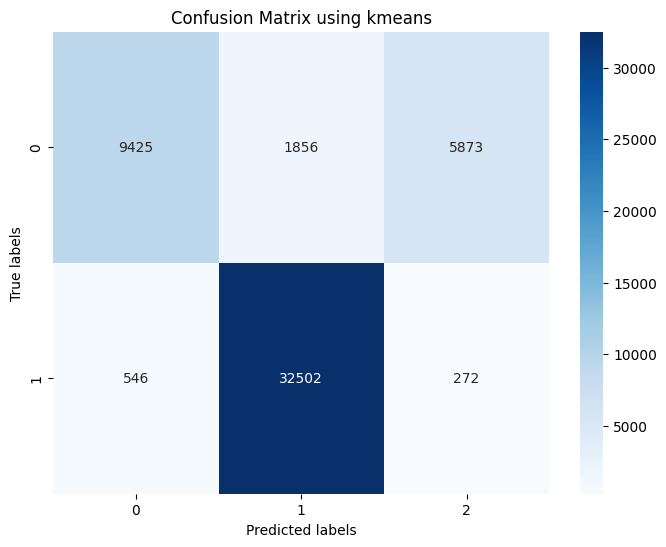

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(hybrid_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using kmeans')
plt.show()

In [31]:


print(data.columns[0:13])  # 印出原始資料的欄位名稱

data_column = [f"{column}" for column in data.columns[0:13]]  # 將欄位名稱轉成字串格式

# 創建新的DataFrame，使用X_test作為資料，並使用和原始資料相同的欄位名稱
df_test_data = pd.DataFrame(X_test, columns=data_column)


Index(['time_start', ' time_end', 'duration', 'src_ip', 'dest_ip', 'src_port',
       'dest_port', 'proto', 'flags', 'router_ip_address_exported',
       'exporter_engine_type_id', 'exporter_id', 'transition'],
      dtype='object')


In [32]:
combined_df = pd.concat([df_test_data, df_svm], axis=1)
combined_df = pd.concat([combined_df, df_km], axis=1)


# 顯示合併後的 DataFrame
print(combined_df)

       time_start   time_end  duration  src_ip  dest_ip  src_port  dest_port  \
0           38923      39169         0     610      794         0          0   
1           38099      38337         0     477     1039     30863         12   
2           44893      45223         1     478      103         6       6458   
3           23217      23383         0     560      855     17856          6   
4           28899      29093         0     602     1003     24827         12   
...           ...        ...       ...     ...      ...       ...        ...   
50469       16937      17089         0     190     1772      2945      16783   
50470       36882      37098         3      37     1249     22521       3500   
50471       45309      45643         0     190     1609      2945       4473   
50472       32723      32922         0     477      939     30863         12   
50473       37943      38181         0     610      682         0          0   

       proto  flags  router_ip_address_

In [33]:
combined_df.to_csv('output.csv', index=False)  # index=False 可以避免將索引列寫入到 CSV 檔案中